<div style="font-size:xx-large;font-family:sans-serif;font-weight:bold;line-height:normal">情報工学実験3 画像変換
<br>第2回：畳み込み演算と画像変換</div>
<hr>

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#空間フィルタリング" data-toc-modified-id="空間フィルタリング-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>空間フィルタリング</a></span><ul class="toc-item"><li><span><a href="#平均化フィルタ（ボックスフィルタ）" data-toc-modified-id="平均化フィルタ（ボックスフィルタ）-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>平均化フィルタ（ボックスフィルタ）</a></span><ul class="toc-item"><li><span><a href="#ガウシアンフィルタ-(Gaussian-Filter)" data-toc-modified-id="ガウシアンフィルタ-(Gaussian-Filter)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>ガウシアンフィルタ (Gaussian Filter)</a></span></li><li><span><a href="#●練習問題-1：特定方向の平滑化" data-toc-modified-id="●練習問題-1：特定方向の平滑化-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>●練習問題 1：特定方向の平滑化</a></span></li><li><span><a href="#●練習問題-2：周辺画素の平均値計算" data-toc-modified-id="●練習問題-2：周辺画素の平均値計算-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>●練習問題 2：周辺画素の平均値計算</a></span></li></ul></li><li><span><a href="#メディアンフィルタ" data-toc-modified-id="メディアンフィルタ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>メディアンフィルタ</a></span></li><li><span><a href="#微分フィルタ" data-toc-modified-id="微分フィルタ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>微分フィルタ</a></span><ul class="toc-item"><li><span><a href="#一次微分フィルタ" data-toc-modified-id="一次微分フィルタ-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>一次微分フィルタ</a></span></li><li><span><a href="#Prewittフィルタ，Sobelフィルタ" data-toc-modified-id="Prewittフィルタ，Sobelフィルタ-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Prewittフィルタ，Sobelフィルタ</a></span></li><li><span><a href="#二次微分フィルタ" data-toc-modified-id="二次微分フィルタ-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>二次微分フィルタ</a></span></li><li><span><a href="#ラプラシアンフィルタ" data-toc-modified-id="ラプラシアンフィルタ-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>ラプラシアンフィルタ</a></span></li><li><span><a href="#鮮鋭化フィルタ" data-toc-modified-id="鮮鋭化フィルタ-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>鮮鋭化フィルタ</a></span></li><li><span><a href="#●練習問題-3:-鮮鋭化フィルタ" data-toc-modified-id="●練習問題-3:-鮮鋭化フィルタ-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>●練習問題 3: 鮮鋭化フィルタ</a></span></li></ul></li></ul></li><li><span><a href="#畳み込み演算の高速化テクニック" data-toc-modified-id="畳み込み演算の高速化テクニック-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>畳み込み演算の高速化テクニック</a></span><ul class="toc-item"><li><span><a href="#積分画像" data-toc-modified-id="積分画像-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>積分画像</a></span></li><li><span><a href="#分離可能フィルタ" data-toc-modified-id="分離可能フィルタ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>分離可能フィルタ</a></span></li></ul></li><li><span><a href="#■課題1:-平均化フィルタ" data-toc-modified-id="■課題1:-平均化フィルタ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>■課題1: 平均化フィルタ</a></span></li><li><span><a href="#■課題2（オプション）：空間フィルタの推定" data-toc-modified-id="■課題2（オプション）：空間フィルタの推定-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>■課題2（オプション）：空間フィルタの推定</a></span></li><li><span><a href="#■課題3（オプション）" data-toc-modified-id="■課題3（オプション）-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>■課題3（オプション）</a></span></li><li><span><a href="#■課題4（オプション）" data-toc-modified-id="■課題4（オプション）-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>■課題4（オプション）</a></span></li></ul></div>

2回目の実験では，**畳み込み演算**(convolution operation)を用いた画像変換を実装してみよう．
<!--畳み込み演算は深層学習で頻繁に使われる畳み込み層(convolution layer)の構成要素でもある．
1次元の信号$f(t)$に対する畳み込み演算は
$$
f'(t) = \int f(t - \tau) h(\tau) d\tau
$$
と定義される．
同様に，二次元の信号$f(x, y)$と$h(x, y)$に対する畳み込み演算は
$$
f'(x, y) = \iint f(x - u, y - v) h(u, v) du dv
$$
と定義される．
-->

ディジタル画像処理では，次式のように畳み込み演算を定義する．
$$
f'(i, j) = (f \ast h) (i, j) = \sum_{n = -w}^{w} \sum_{m = -w}^{w} f(i + m, j + n) h(m, n)
$$
ここで，$f(i, j)$は画像，$h(m, n)$は線形フィルタである．空間フィルタリングともよばれる．
畳み込み演算ではなく相関演算(correlation)とよぶ方が適切であるが，画像処理では畳み込みとよばれることが多い．

畳み込み演算のイメージは以下のとおり：<br/>
<img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" width=400px/><br/>
source: [Stanford deep learning](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution)


以下では，空間フィルタリングの例として，平滑化フィルタ，微分フィルタ，鮮鋭化フィルタを実装しながら，その作用を観察する．

# 空間フィルタリング

## 平均化フィルタ（ボックスフィルタ）

入力画像のすべての画素について，その周辺画素の画素値の平均値を出力すると画像に重畳するノイズを除去できる．この処理を画像の**平滑化**(smoothing)とよぶ.

まずは， scikit-imageの`correlate()`(フィルタが中心画素の周りに対称であれば`convolve()`関数と等価）を利用して畳み込み演算を実行してみよう．マニュアルは[こちら](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html?highlight=correlate#scipy.ndimage.correlate)．

<Figure size 640x480 with 0 Axes>

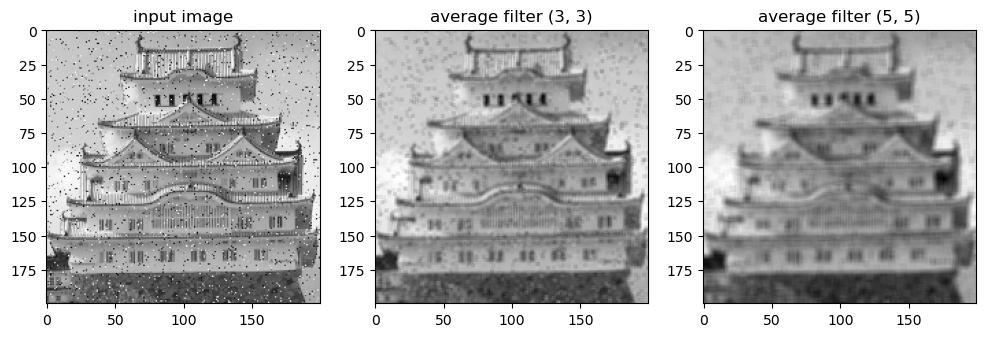

In [1]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
plt.gray()
%matplotlib inline

# 平均化フィルタ（ボックスフィルタともよぶ）
kernel3 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]) / 9.0
kernel5 = np.ones((5, 5)) / 25.0

# グレースケール画像へ変換(0以上1以下の小数値をとるので255をかけておく
im = 255 * rgb2gray(imread("data/himeji_noise.png"))  

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.title("input image"); plt.imshow(im)
im2 = correlate(im, kernel3)
plt.subplot(1, 3, 2); plt.title("average filter (3, 3)"); plt.imshow(im2)
im3 = correlate(im, kernel5)
plt.subplot(1, 3, 3); plt.title("average filter (5, 5)"); plt.imshow(im3)

### ガウシアンフィルタ (Gaussian Filter)

単純な平均ではなく注目画素に近いほど大きな重みを付ける加重平均化フィルタの一つに，
重みを2次元ガウス分布
$$ h(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2+y^2}{2\sigma^2}\right) $$
としたガウシアンフィルタがある．平均化フィルタと同様に平滑化，ノイズ除去の効果がある．

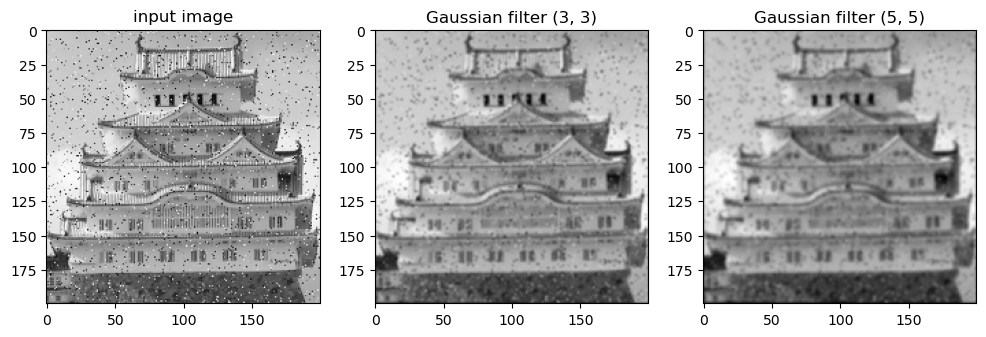

In [4]:
# 2次元ガウス分布の近似
gauss3 = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]]) / 16.0
gauss5 = np.array([[1, 4, 6, 4, 1],
                [4, 16, 24, 16, 4],
                [6, 24, 36, 24, 6],
                [4, 16, 24, 16, 4],
                [1, 4, 6, 4, 1]]) / 256.0

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.title("input image"); plt.imshow(im)
im2 = correlate(im, gauss3, mode="constant")
plt.subplot(1, 3, 2); plt.title("Gaussian filter (3, 3)"); plt.imshow(im2)
im3 = correlate(im, gauss5, mode="constant")
plt.subplot(1, 3, 3); plt.title("Gaussian filter (5, 5)"); plt.imshow(im3)

scikit-imageの関数`gaussian()`を使えば，パラメータ$\sigma$を指定するだけでガウシアンフィルタを実行できる．マニュアルは[こちら](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)．

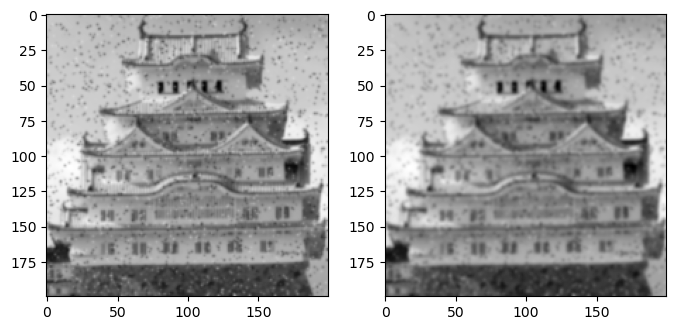

In [7]:
from skimage.filters import gaussian
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(gaussian(im, sigma = 0.8))
plt.subplot(1, 2, 2); plt.imshow(gaussian(im, sigma = 1.1))

### ●練習問題 1：特定方向の平滑化

下図のように平滑化を特定の方向に限定して行うフィルタを考えることができる．
注目画素を挟んでその左右一列に並ぶ画素の平均値を計算するものである．この平滑化フィルタを適用した結果を出力しなさい．<br/>
<img src="img/filter30.png" width=300px/>

正解（出力）：<br/>
<img src="img/lena_blur.png" width=200px/>

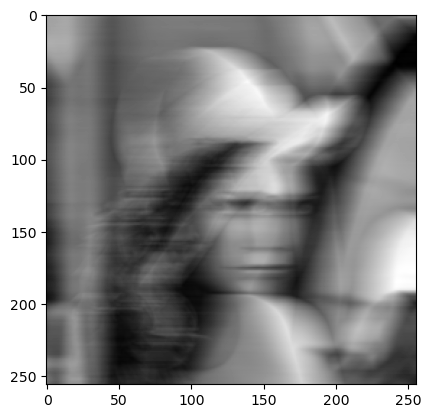

In [20]:
filter30 = np.zeros((30, 30))
# ↓ここにコードを追加 
filter30[15, :] = 1/30

lena_im = 255 * rgb2gray(imread("data/Lenna.bmp"))
lena_im2 = correlate(lena_im, filter30)
plt.imshow(lena_im2)

### ●練習問題 2：周辺画素の平均値計算
1. 指定されたj行目i列目の画素`im[j,i]`を中心とした$3\times3$近傍の平均値を計算する関数`myaverage_neighbor3x3(im, j, i)`を`for`文を使って実装しなさい．OpenCV, scikit-image等のライブラリを使用せずに，pythonとnumpyのみを用いて実装すること．`np.sum()`, `np.average()`, `np.mean()`は使用しないこと．

In [24]:
def myaverage_neighbor3x3(im, j, i):
    average = 0
    # ↓ここにコードを追加
    for jj in range(-1, 2):
        for ii in range(-1, 2):
            average += im[j+jj, i+ii]
    average /= 9
    # ↑ここまで
    return average

print(myaverage_neighbor3x3(lena_im, 30, 30)) # 115.0･･･が表示されれば成功

115.01142222222224


2. 指定された`i`行目`j`列目の画素`im[j,i]`を中心とした$n \times n$近傍($n$は奇数)の平均値を計算する関数`myaverage_neighbor(im, j, i, filter_size)`を`for`文を使って実装しなさい．$n$は引数`filter_size`として指定される．OpenCV, scikit-image等のライブラリを使用せずに，pythonとnumpyのみを用いて実装すること．ただし`np.sum()`, `np.average()`, `np.mean()`は使用しないこと．

In [29]:
def myaverage_neighbor(im, j, i, filter_size):
    average = 0
    # ↓ここにコードを追加
    filter_size2 = filter_size // 2
    for jj in range(-filter_size2, filter_size2 + 1):
        for ii in range(-filter_size2, filter_size2 + 1):
            average += im[j+jj, i+ii]
    average /= (filter_size * filter_size)
    # ↑ここまで
    return average

print(myaverage_neighbor(lena_im, 30, 30, 5)) # 112.9･･･が表示されれば成功

112.88592800000002


## メディアンフィルタ

平均値の代わりに，近傍画素のメディアン（中央値）を出力とする画像フィルタである（非線形フィルタの一種）．平均化フィルタ，ガウシアンフィルタはエッジがなまって，ぼけた画像になるのに対して，エッジが保存され，ごま塩状のノイズが消えているのがわかる．

scikit-imageの`median_filter()`関数を使ってメディアンフィルタを実行して，結果を観察する．




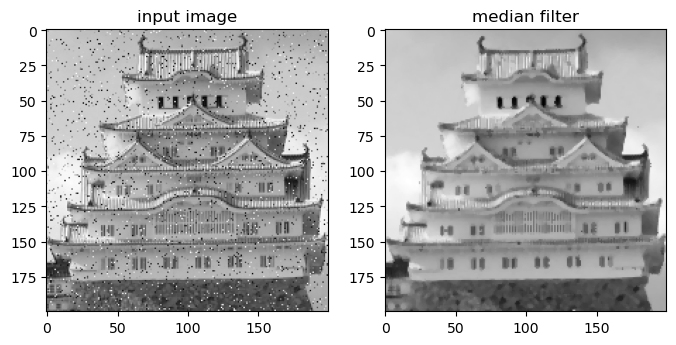

In [32]:
from scipy.ndimage import median_filter
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.title("input image"); plt.imshow(im)
plt.subplot(1, 2, 2); plt.title("median filter"); plt.imshow(median_filter(im, size=3))

## 微分フィルタ

### 一次微分フィルタ
**一次微分フィルタ** (image derivative filter)は，画像中で明るさが急に変化する**エッジ**(edge)を取り出すときに使われるフィルタである．
グレースケール画像の画素を$x$方向，$y$方向に順に見ていったとき，明るさ（画素値）の差分を出力する．
差分の計算にはいくつかのバリエーションがあるが，もっとも単純なのは隣接画素の差分
$$ \Delta_x f(i, j) = f(i, j) - f(i-1, j), \;\; \mathrm{(x軸方向の差分)}\\
   \Delta_y f(i, j) = f(i, j) - f(i,j-1) \;\; \mathrm{(y軸方向の差分)} $$
をとる方法である．つまり，$x$方向，$y$方向の一次微分フィルタはそれぞれ
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
-1 & 1 & 0\\ \hline
0 & 0 & 0\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
0 & -1 & 0\\ \hline
0 & 1 & 0\\ \hline
0 & 0 & 0\\ \hline
\end{array}
$$
となる．

$(\Delta_x f(i, j), \Delta_y f(i, j))$を画像$f$の**勾配** (gradient), 勾配の**大きさ**
$\sqrt{(\Delta_x f(i, j))^2 + (\Delta_y f(i, j))^2}$を**エッジ強度**とよぶ．
エッジ強度があるしきい値より大きな値をとる点を選択すれば，エッジを抽出することができる．

横方向の微分フィルタ(image derivative)を実装してみよう．

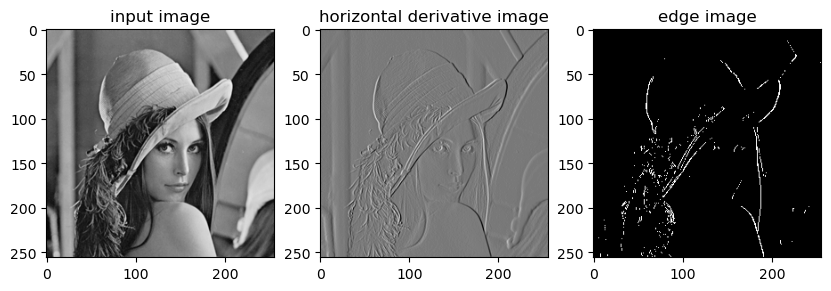

In [35]:
diffx1 = np.array([[0, 0, 0],
                   [-1, 1, 0],
                   [0, 0, 0]], dtype=np.float32)
im = 255 * rgb2gray(imread("data/Lenna.bmp"))

im2 = correlate(im, diffx1, mode="constant")
im3 = (im2 * im2 > 60 * 60) * 1

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1); plt.title("input image"); plt.imshow(im)
plt.subplot(1, 3, 2); plt.title("horizontal derivative image"); plt.imshow(im2)
plt.subplot(1, 3, 3); plt.title("edge image"); plt.imshow(im3)

縦方向の微分フィルタ

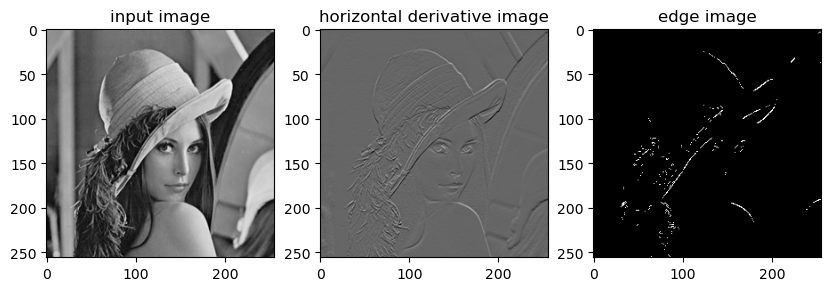

In [38]:
diffy1 = np.array([[0, -1, 0],
                   [0, 1, 0],
                   [0, 0, 0]], dtype=np.float32)

im2 = correlate(im, diffy1, mode="constant")
im3 = (im2 * im2 > 60 * 60) * 1

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1); plt.title("input image"); plt.imshow(im)
plt.subplot(1, 3, 2); plt.title("horizontal derivative image"); plt.imshow(im2)
plt.subplot(1, 3, 3); plt.title("edge image"); plt.imshow(im3)

### Prewittフィルタ，Sobelフィルタ
上記の一次微分フィルタは，ノイズに対して大きく反応してしまう欠点がある．ノイズを抑えながらエッジを抽出するために，平滑化フィルタと組み合わせた空間フィルタとして
Prewittフィルタ，Sobelフィルタが用いられる（Prewitt, Sobelは開発者の名前)．

x方向のy方向のPrewittフィルタ：
$$
\begin{array}{|c|c|c|}
\hline
-1 & 0 & 1\\ \hline
-1 & 0 & 1\\ \hline
-1 & 0 & 1\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
-1 & -1 & -1\\ \hline
0 & 0 & 0\\ \hline
1 & 1 & 1\\ \hline
\end{array}
$$

x方向とy方向のSobelフィルタ：
$$
\begin{array}{|c|c|c|}
\hline
-1 & 0 & 1\\ \hline
-2 & 0 & 2\\ \hline
-1 & 0 & 1\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
-1 & -2 & -1\\ \hline
0 & 0 & 0\\ \hline
1 & 2 & 1\\ \hline
\end{array}
$$
と表される．


### 二次微分フィルタ

画像の二次微分は，上で説明した一次微分の微分（差分）をとったもの
$$
\begin{align}
\Delta_x^2 f(i, j) &=(f(i+1, j) - f(i, j)) - (f(i, j) - f(i-1,j)) = f(i+1, j) - 2f(i, j) + f(i-1, j)\\
\Delta_y^2 f(i, j) &=(f(i, j+1) - f(i, j)) - (f(i, j) - f(i, j-1)) = f(i, j+1) - 2f(i, j) + f(i, j-1)
\end{align}
$$
と考えることができる．

したがって，x方向，y方向の二次微分フィルタは
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
1 & -2 & 1\\ \hline
0 & 0 & 0\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
0 & -2 & 0\\ \hline
0 & 1 & 0\\ \hline
\end{array}
$$


### ラプラシアンフィルタ

一般に，関数$f(x, y)$のラプラシアンは
$$
\frac{\partial^2}{\partial x^2} f(x, y) + \frac{\partial^2}{\partial y^2} f(x, y)
$$
と定義される．デジタル画像のラプラシアンフィルタはx方向，y方向の二次微分フィルタの和として定義する：
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
1 & -2 & 1\\ \hline
0 & 0 & 0\\ \hline
\end{array}
+
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
0 & -2 & 0\\ \hline
0 & 1 & 0\\ \hline
\end{array}
=
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
1 & -4 & 1\\ \hline
0 & 1 & 0\\ \hline
\end{array}
$$
ラプラシアンを使うと，方向によらずエッジを抽出することができる．ラプラシアンの出力を観察すると，エッジ点をはさんでプラスの値とマイナスの値が対になって現れる傾向がある．そこで，エッジ点を正確に求めたい場合は，ラプラシアンの符号がプラスからマイナス，または，マイナスからプラスへ変化し，ちょうど0になる位置（この位置を**ゼロ交差**(zero crossing)とよぶ）を求めればよい．

### 鮮鋭化フィルタ
入力画像$f(x, y)$に対して，ラプラシアンフィルタの出力を定数倍してから引くことで，エッジが強調された（鮮鋭化された）画像が得られる．鮮鋭化フィルタは
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
0 & 1 & 0\\ \hline
0 & 0 & 0\\ \hline
\end{array}-k
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
1 & -4 & 1\\ \hline
0 & 1 & 0\\ \hline
\end{array}
=
\begin{array}{|c|c|c|}
\hline
0 & -k & 0\\ \hline
-k & 1+4k & -k\\ \hline
0 & -k & 0\\ \hline
\end{array}
$$
上で述べたように，ラプラシアンフィルタはエッジをはさんでプラスとマイナスが現れる傾向があるので，定数倍して引き算することでエッジを強調する効果がある．

### ●練習問題 3: 鮮鋭化フィルタ

鮮鋭化フィルタを実装し，実行結果を確認しなさい．<br>
※鮮鋭化フィルタ後の出力画像は，画素値が0を下回る，もしくは255を上回ることがあるので，表示する前に`np.clip(im, 0, 255)`を用いて0以上255以下の範囲に収める必要がある．`np.clip(im, a_min, a_max)`を用いると`a_min`より小さい値は`a_min`に，`a_max`より大きい値は`a_max`に置き換えられる．
<img src="img/sharpening.png" width=400px/>

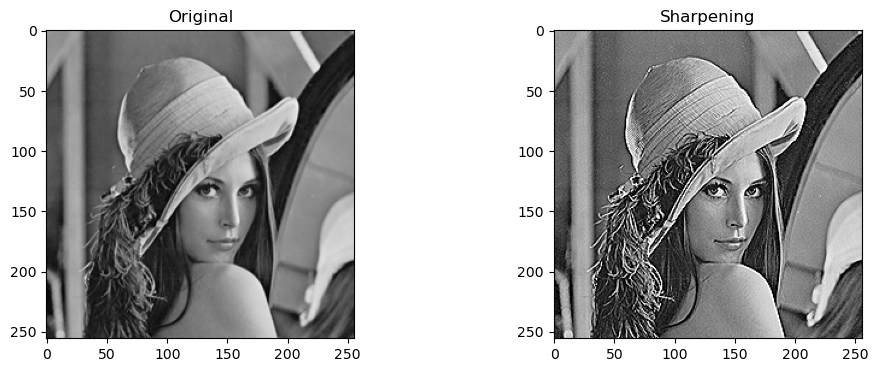

In [57]:
k = 1.0
sharpening = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])\
- k * np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
temp = correlate(im, sharpening)
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1); plt.title("Original"); plt.imshow(im)
im2 = np.clip(correlate(im, sharpening), 0, 255)
plt.subplot(1, 2, 2); plt.title("Sharpening"); plt.imshow(im2)


# 畳み込み演算の高速化テクニック

畳み込み演算は，すべての画素について積和演算を繰り返すため計算コストが大きくなる．
ここでは平均化フィルタを対象に畳み込み演算を高速化する二つのテクニックを紹介する．

## 積分画像
積分画像(Integral image)を用いた平均化フィルタの高速化について説明する．
  * 積分画像$s[j, i]$は
$$
s[j, i] \overset{\mathrm{def}}{=}\sum_{k \leq i} \sum_{l \leq j} f[l, k]
$$
によって定義される．<br/>
<img src="img/integral_image.png" width=400px/> d
つまり，注目画素より左上に位置する全ての画素値の総和(上記の紫の範囲の画素値の和)がその画素の値(黄色の画素値)になっているような画像である．
次式を用いると画像を左上画素から1度スキャンするだけ，つまり
$\mathrm{O}(WH)$の計算コストで積分画像$s[j, i]$を求めることができる:
$$s[j, i] = s[j, i-1] + s[j - 1, i] - s[j-1, i-1] + f[j, i].$$
ただし，$W, H$は入力画像$f$の幅と高さである．<br/>
<img src="img/how_to_make_integral_image_pad.png" width=500px/><br/>
つまり，積分画像を作成する際に黄色の画素値を求めるには，積分画像上の緑，青，赤の画素値と，元画像のオレンジの画素値を参照すればよい．この処理を左上から順に繰り返すことにより，積分画像を高速に作成可能である．
  * 積分画像$s(i, j)$を用いて矩形$\left[i_0, i_1\right]\times\left[j_0, j_1\right]$
内部の平均値を求めるには，次式が成り立つことを使えばよい．
$$
\begin{align}
\mathtt{np.mean}(f[j_0:j_1+1, i_0:i_1+1]) &= \frac{1}{(j_1-j_0+1)(i_1-i_0+1)}\sum_{i_0 \leq i \leq i_1} \sum_{j_0 \leq j \leq j_1} f[j, i]\\
                        &= \frac{1}{(j_1-j_0+1)(i_1-i_0+1)}(s[j_1, i_1] - s[j_1, i_0-1] - s[j_0-1, i_1]+s[j_0-1, i_0 - 1]).
\end{align}
$$<br/>
<img src="img/sum_with_integral_image_pad.png" width=600px/><br/>
つまり，上記の紫の範囲内の平均値を求めるには，積分画像を使うと，オレンジと青と緑と赤の4点を参照すれば求めることができる．


## 分離可能フィルタ

平均化フィルタは分離可能フィルタ(separable filter)の一つで，
サイズ $k\times k$ の平均化フィルタは以下の二つの1次元フィルタに分離できる：
* 幅$k$高さ$1$の平均化フィルタ
* 幅$1$高さ$k$の平均化フィルタ

分離した1次元フィルタをこの順に作用することで平均化フィルタを計算できる．
    例えば，$3\times3$の平均化フィルタ
$$
\frac{1}{9}
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1\\ \hline
1 & 1 & 1\\ \hline
1 & 1 & 1\\ \hline
\end{array}
$$
での畳み込みは，幅$3$高さ$1$の平均化フィルタ
$$
\frac{1}{3}
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1\\ \hline
\end{array}
$$
による畳み込み後に幅$1$高さ$3$の平均化フィルタ
$$
\frac{1}{3}
\begin{array}{|c|}
\hline
1 \\ \hline
1 \\ \hline
1 \\ \hline
\end{array}
$$
により畳み込みを行うのと等価である．
<img width=800px src="img/separable_filter.jpg"/>

# ■課題1: 平均化フィルタ

1. 以下に挙げる3通りの方法で平均化フィルタを実装しなさい．
    * (a) __`myaverage_naive(image, size)`__:
        * pythonの`for`文を利用して，画像中のすべての画素について，`size*size`ブロックの平均を計算する.OpenCV, scikit-image等のライブラリ，numpyの関数`np.sum()`, `np.average()`, `np.mean()`は使用しないで実装すること.4重ループになる．
    * (b) __`myaverage_numpy(image, size)`__:
        * pythonの`for`文を利用して画像のすべての画素を走査するが，平均化の処理にnumpyの`np.mean()`関数を利用する.2重ループになる．
    * (c) __`myaverage_integral(image, filter_size)`__: 
        * 積分画像 (integral image)を用いて実装する．numpyの関数`np.pad(im, pad_width, mode="constant")`は使用しても良い（詳しくは[マニュアル参照](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)）．ただし`np.sum()`, `np.average()`, `np.mean()`は使用しないこと．
        * scikit-imageにも積分画像を求める関数[`skimage.transform.integral_image()`](https://scikit-image.org/docs/0.14.x/api/skimage.transform.html#skimage.transform.integral_image), [`skimage.transform.integrate()`](https://scikit-image.org/docs/0.14.x/api/skimage.transform.html#skimage.transform.integrate)が存在する．これら関数を使用しても良いが，自身で積分画像を求める関数integral_image()を実装した場合は加点する．
        
2. 実装した関数(a),(b),(c)の出力結果が，scikit-imageで実装した結果と一致することを確認しなさい．具体的には，平均二乗誤差$\mathrm{MSE}$が1未満であることを確認する．

3. 画像の拡大率$m$ を変化させながら，平均化フィルタ関数 (a), (b), (c)の処理時間を計測し，グラフを描いて比較するとともに，計算量の観点から考察しなさい．
    * ヒント1：元画像のサイズを$W\times H$とするとき，$mW\times mH$に拡大してから処理する．
    * ヒント2: 画像の拡大には`skimage.transform.resize()`関数を使用するとよい (詳しくは[マニュアル参照](https://scikit-image.org/docs/0.14.x/api/skimage.transform.html#skimage.transform.resize))．
    * ヒント3: 処理時間を計測するコード片 ([timeモジュール](https://docs.python.org/ja/3/library/time.html)): 
```python
start = time.time()
# 計測したい処理をここ記述
elapsed_time = time.time() - start
print(elapsed_time)
```
4. フィルタサイズ$w$（フィルタの幅・高さは$w \times w$）を変化させながら，平均化フィルタ関数(a), (b), (c)の処理時間を計測し，グラフを描いて比較するとともに，計算量の観点から考察しなさい．

6. (オプション) 平均化フィルタが分離可能フィルタ (separable filter)であることを用いて，以下の平均化フィルタ関数を実装し，scikit-imageと結果が一致することを確認しなさい．
    * (d) __`myaverage_separable(image, filter_size)`__ <br/>

7. (オプション) 画像サイズ及びフィルタサイズを変化させながら，平均化フィルタ(a)-(d)の処理時間を計測することで，処理時間を比較し計算量の観点から考察しなさい．

C:\Users\uiro_\AppData\Local\Temp\ipykernel_14888\2257355910.py:6: DeprecationWarning: Please use `correlate` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import correlate


mse_naive= 1.4281345346060324e-27
mse_numpy= 9.03704222436173e-28
mse_integral= 3.374989824753389e-21
mse_separable= 382.4427640769805


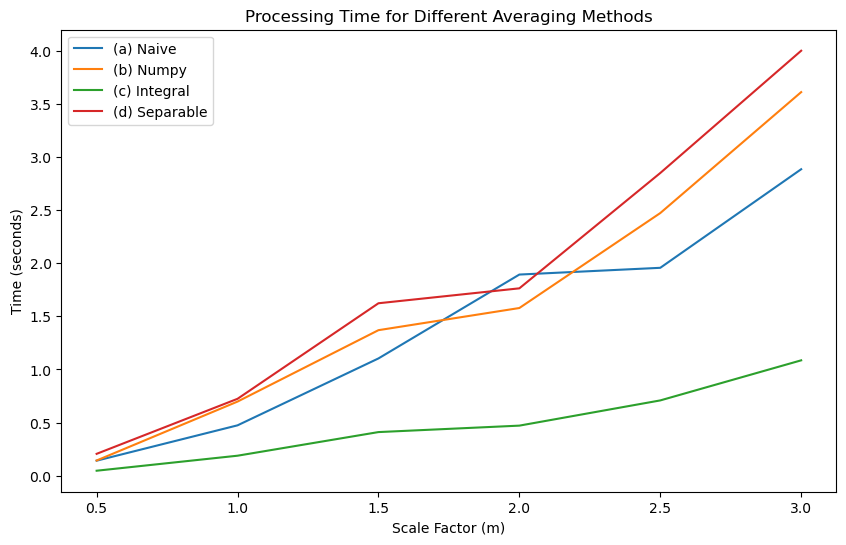

In [105]:
import time
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from scipy.ndimage.filters import correlate
import matplotlib.pyplot as plt
%matplotlib inline

def mse(y1, y2):
    return ((y1 - y2)**2).mean()

def myaverage_naive(im, filter_size = 5):
    ''' im : 入力画像, filter_size : 平均化フィルタのサイズ（奇数） '''
    iheight, iwidth = im.shape[:2]
    imout = np.zeros((iheight, iwidth))
    
    # ↓ここにコードを追加    
    pad_size = filter_size // 2
    
    # 画像をパディングする
    padded_im = np.zeros((iheight + 2 * pad_size, iwidth + 2 * pad_size))
    padded_im[pad_size:pad_size + iheight, pad_size:pad_size + iwidth] = im
    
    for i in range(iheight):
        for j in range(iwidth):
            # フィルタウィンドウ内の合計値を計算
            sum_value = 0.0
            for k in range(filter_size):
                for l in range(filter_size):
                    sum_value += padded_im[i + k, j + l]
            # 平均値を計算
            imout[i, j] = sum_value / (filter_size * filter_size)
    # ↑ここまで
    
    return imout

def myaverage_numpy(im, filter_size = 5):
    ''' im : 入力画像, filter_size : 平均化フィルタのサイズ（奇数） '''
    iheight, iwidth = im.shape[:2]
    imout = np.zeros((iheight, iwidth))
    
    # ↓ここにコードを追加
    pad_size = filter_size // 2
    
    # 画像をパディングする
    padded_im = np.zeros((iheight + 2 * pad_size, iwidth + 2 * pad_size))
    padded_im[pad_size:pad_size + iheight, pad_size:pad_size + iwidth] = im
    
    for i in range(iheight):
        for j in range(iwidth):
            # フィルタウィンドウ内の平均値を計算
            window = padded_im[i:i + filter_size, j:j + filter_size]
            imout[i, j] = np.mean(window)
    # ↑ここまで  
    
    return imout

def myaverage_integral(im, filter_size=5):
    ''' im : 入力画像, filter_size : 平均化フィルタのサイズ（奇数） '''
    def integral_image(im):
        ''' 積分画像の作成 '''
        iheight, iwidth = im.shape[:2]
        s = np.zeros_like(im)
        
        for i in range(iheight):
            for j in range(iwidth):
                s[i, j] = im[i, j]
                if i > 0:
                    s[i, j] += s[i - 1, j]
                if j > 0:
                    s[i, j] += s[i, j - 1]
                if i > 0 and j > 0:
                    s[i, j] -= s[i - 1, j - 1]
        
        return s
    
    iheight, iwidth = im.shape[:2]
    imout = np.zeros((iheight, iwidth))

    # パディングのサイズを計算
    pad_size = filter_size // 2
    
    # 画像をパディングする
    padded_im = np.pad(im, pad_width=pad_size, mode='constant', constant_values=0)
    
    # 積分画像の計算
    integral_im = integral_image(padded_im)
    
    for i in range(iheight):
        for j in range(iwidth):
            r1 = i
            c1 = j
            r2 = i + filter_size - 1
            c2 = j + filter_size - 1
            
            total = integral_im[r2, c2]
            if r1 > 0:
                total -= integral_im[r1 - 1, c2]
            if c1 > 0:
                total -= integral_im[r2, c1 - 1]
            if r1 > 0 and c1 > 0:
                total += integral_im[r1 - 1, c1 - 1]
            
            imout[i, j] = total / (filter_size * filter_size)
    
    return imout

def myaverage_separable(im, filter_size=5):
    '''im : 入力画像, filter_size : 平均化フィルタのサイズ（奇数）''' 
    iheight, iwidth = im.shape[:2]
    imout = np.zeros((iheight, iwidth))
    
    pad_size = filter_size // 2
    kernel = np.ones(filter_size) / filter_size
    
    # 横方向のフィルタリング
    padded_im = np.pad(im, ((0, 0), (pad_size, pad_size)), mode='constant', constant_values=0)
    im_temp = np.zeros_like(padded_im)
    
    for i in range(iheight):
        for j in range(iwidth):
            im_temp[i, j] = np.sum(padded_im[i, j:j + filter_size] * kernel)
    
    # 縦方向のフィルタリング
    padded_im_temp = np.pad(im_temp[:, pad_size:-pad_size], ((pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    for i in range(iheight):
        for j in range(iwidth):
            imout[i, j] = np.sum(padded_im_temp[i:i + filter_size, j] * kernel)
    
    return imout



#　拡大率変化用
def resize_and_time(image, scales, filter_size):
    times_naive = []
    times_numpy = []
    times_integral = []
    times_separable = []
    
    for scale in scales:
        resized_image = resize(image, (int(image.shape[0] * scale), int(image.shape[1] * scale)))
        
        start = time.time()
        myaverage_naive(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_naive.append(elapsed_time)
        
        start = time.time()
        myaverage_numpy(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_numpy.append(elapsed_time)
        
        start = time.time()
        myaverage_integral(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_integral.append(elapsed_time)

        start = time.time()
        myaverage_separable(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_separable.append(elapsed_time)
        
    return times_naive, times_numpy, times_integral, times_separable

'''
#フィルタサイズ変化用
def resize_and_time(image, scales, filter_size):
    times_naive = []
    times_numpy = []
    times_integral = []
    times_separable = []
    
    for filter_size in filter_sizes:
        resized_image = resize(image, (int(image.shape[0] * scales), int(image.shape[1] * scales)))
        
        start = time.time()
        myaverage_naive(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_naive.append(elapsed_time)
        
        start = time.time()
        myaverage_numpy(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_numpy.append(elapsed_time)
        
        start = time.time()
        myaverage_integral(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_integral.append(elapsed_time)

        start = time.time()
        myaverage_separable(resized_image, filter_size)
        elapsed_time = time.time() - start
        times_separable.append(elapsed_time)
        
    return times_naive, times_numpy, times_integral, times_separable
'''

im = 255 * rgb2gray(imread("data/himeji_noise.png"))
filter_sizes = 5
scales = [0.5, 1, 1.5, 2, 2.5, 3]

# 処理時間の計測
times_naive, times_numpy, times_integral, times_separable = resize_and_time(im, scales, filter_sizes)

#　拡大率変化用
kernel = np.ones((filter_sizes, filter_sizes)) / (filter_sizes ** 2)
im2a = myaverage_naive(im, filter_sizes)
im2b = myaverage_numpy(im, filter_sizes)
im2c = myaverage_integral(im, filter_sizes)
im2d = myaverage_separable(im, filter_sizes)   # オプション
im2_gt = correlate(im, kernel, mode="constant")

print("mse_naive=", mse(im2_gt, im2a))         # 1未満であればOK
print("mse_numpy=", mse(im2_gt, im2b))         # 1未満であればOK
print("mse_integral=", mse(im2_gt, im2c))      # 1未満であればOK
print("mse_separable=", mse(im2_gt, im2d))     # オプション

'''
#  フィルタサイズ変化用
for size in filter_sizes:
    kernel = np.ones((size, size)) / (size ** 2)
    im2a = myaverage_naive(im, size)
    im2b = myaverage_numpy(im, size)
    im2c = myaverage_integral(im, size)
    im2_gt = correlate(im, kernel, mode="constant")

    print(f"mse_naive (filter size {size})=", mse(im2_gt, im2a))         # 1未満であればOK
    print(f"mse_numpy (filter size {size})=", mse(im2_gt, im2b))         # 1未満であればOK
    print(f"mse_integral (filter size {size})=", mse(im2_gt, im2c))      # 1未満であればOK

'''
# 結果のプロット
plt.figure(figsize=(10, 6))

#　拡大率変化用
plt.plot(scales, times_naive, label='(a) Naive')
plt.plot(scales, times_numpy, label='(b) Numpy')
plt.plot(scales, times_integral, label='(c) Integral')
plt.plot(scales, times_separable, label='(d) Separable')

'''
#フィルタサイズ変化用
plt.plot(filter_sizes, times_naive, label='(a) Naive')
plt.plot(filter_sizes, times_numpy, label='(b) Numpy')
plt.plot(filter_sizes, times_integral, label='(c) Integral')
#plt.plot(filter_sizes, times_separable, label='(d) Separable')
'''

plt.xlabel('Scale Factor (m)')
plt.ylabel('Time (seconds)')
plt.title('Processing Time for Different Averaging Methods')
plt.legend()
plt.show()

# ■課題2（オプション）：空間フィルタの推定

画像ファイル`"exercise/Lenna2.png"`, `"exercise/Lenna2_edited.png"`から読み込んだグレースケール画像をそれぞれ$f$, $f'$とよぶ．

1. 画像$f'(i, j)$はグレースケール画像$f(i, j)$に空間フィルタ$h(m, n)$ (3x3)を畳み込んで生成した画像である．空間フィルタ$h(m, n)$を求めなさい．ただし，出力画像の画素値が0～255に収まるようにオフセット$b$が加算されていることに注意する．<br>
(ヒント)注目画素$(i, j)$を中心とする画像$f$の3x3ブロックを
$$ \begin{array}{|c|c|c|}
\hline
f_1 & f_2 & f_3\\ \hline
f_4 & f_5 & f_6\\ \hline
f_7 & f_8 & f_9\\ \hline
\end{array}
\leftarrow
\begin{array}{|c|c|c|}
\hline
f(i-1,j-1) & f(i-1,j) & f(i-1,j+1)\\ \hline
f(i,j-1) & f(i, j) & f(i, j+1)\\ \hline
f(i+1,j-1) & f(i+1,j) & f(i+1,j+1)\\ \hline
\end{array}, 
$$求めたい空間フィルタ$h$を
$$ \begin{array}{|c|c|c|}
\hline
h_1 & h_2 & h_3\\ \hline
h_4 & h_5 & h_6\\ \hline
h_7 & h_8 & h_9\\ \hline
\end{array}
$$
とすると，すべての画素$(i, j)$について
$$
f'(i, j) = \sum_{k=1}^{9} f_k h_k + b
$$
の関係が成り立つことを利用する．

    例えば，下の図のような場合，

<img src="img/hint_for_assignment2.png" width=400px/>

$3h_1+4h_2+7h_3+1h_4+2h_5+5h_6+7h_7+8h_8+3h_9+b=24$が成り立つ．

2. 画像$f$に画像フィルタ$h$を畳み込んだ結果が画像$f'$になることを確認しなさい（MSEが1以下になることを確認しなさい)．ただし，scikit-learnの関数を使ってもよい．


In [ ]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import gray2rgb
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

plt.gray()

im = 255 * imread("exercise/Lenna2.png", as_gray=True)
imout = 255 * imread("exercise/Lenna2_edited.png", as_gray=True)

# ↓ここにコードを追加

# ↑ここまで

# ■課題3（オプション）
メディアンフィルタをOpenCV, Scikit-image等のライブラリを使用せずに，pythonとnumpyのみを用いて実装しなさい．numpyの関数 `np.median()`, `np.pad()`は使用してよい．`scikit.ndimage.median_filter()`の出力結果を比較する場合はパディング方法の違いに注意するとよい．

# ■課題4（オプション）
空間フィルタ（微分フィルタ含む），メディアンフィルタ，濃淡変換を組み合わせて，視覚的に面白い画像変換を設計し実装しなさい．